In [1]:
import random as r
import numpy as np
import pandas as pd
import seaborn as sns

# Matplotlib Imports
import matplotlib  
import matplotlib.pyplot as plt
matplotlib.use(u'nbAgg')
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, confusion_matrix
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [2]:
csv_gram = pd.read_csv("csv.csv", sep=",", index_col=False)
doc_gram = pd.read_csv("doc.csv", sep=",", index_col=False)
gif_gram = pd.read_csv("gif.csv", sep=",", index_col=False)
gz_gram = pd.read_csv("gz.csv", sep=",", index_col=False)
html_gram = pd.read_csv("html.csv", sep=",", index_col=False)
jpg_gram = pd.read_csv("jpg.csv", sep=",", index_col=False)
log_gram = pd.read_csv("log.csv", sep=",", index_col=False)
pdf_gram = pd.read_csv("pdf.csv", sep=",", index_col=False)
png_gram = pd.read_csv("png.csv", sep=",", index_col=False)
ppt_gram = pd.read_csv("ppt.csv", sep=",", index_col=False)
ps_gram = pd.read_csv("ps.csv", sep=",", index_col=False)
txt_gram = pd.read_csv("txt.csv", sep=",", index_col=False)
xls_gram = pd.read_csv("xls.csv", sep=",", index_col=False)
xml_gram = pd.read_csv("xml.csv", sep=",", index_col=False)

In [3]:
csv_gram['??'] = 1
doc_gram['??'] = 2
gif_gram['??'] = 3
gz_gram['??'] = 4
html_gram['??'] = 5
jpg_gram['??'] = 6
log_gram['??'] = 7
pdf_gram['??'] = 8
png_gram['??'] = 9
ppt_gram['??'] = 10
ps_gram['??'] = 11
txt_gram['??'] = 12
xls_gram['??'] = 13
xml_gram['??'] = 14

In [4]:
print(jpg_gram.shape)
print(png_gram.shape)
#print(exe_gram.shape)
print(html_gram.shape)
print(pdf_gram.shape)
print(ppt_gram.shape)
print(xls_gram.shape)
print(doc_gram.shape)

(937, 258)
(209, 258)
(3839, 258)
(3766, 258)
(892, 258)
(667, 258)
(1102, 258)


In [5]:
#png_gram = png_gram.drop(png_gram.index[480:])
#html_gram = html_gram.drop(html_gram.index[470:])

In [6]:
files_df = pd.concat([csv_gram, doc_gram, gif_gram, gz_gram, html_gram, jpg_gram, log_gram, pdf_gram, png_gram, ppt_gram, ps_gram, txt_gram, xls_gram, xml_gram], axis=0)

In [7]:
files_df.drop(columns={'ID'}, axis=1, inplace=True)
files_df.rename(columns = {'??':'Class'}, inplace = True)
files_df = files_df.fillna(0)
files_df.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18203,455,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
18204,456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
18205,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
18206,458,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


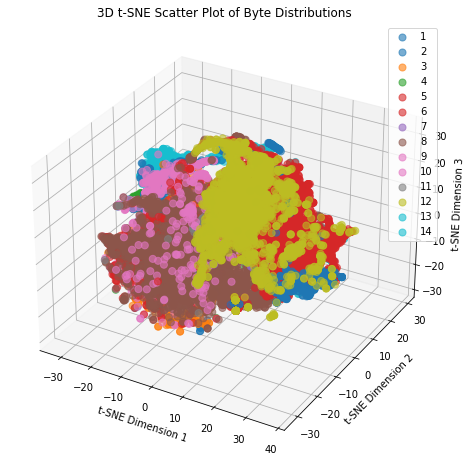

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

features = files_df.iloc[:, :-1].values 
class_labels = files_df['Class'].values

# Convert the class labels to numerical values (required for plotting with colors)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(class_labels)

# Step 2: Compute t-SNE embedding
tsne = TSNE(n_components=3, random_state=42)  # Set n_components to 3 for 3D embedding
tsne_embeddings = tsne.fit_transform(features)

# Step 3: Create the 3D scatter plot with different colors for each class and file names as the legend
unique_labels = np.unique(encoded_labels)
num_classes = len(unique_labels)
colors = plt.cm.tab10(np.linspace(0, 1, num_classes))  # Use a colormap for coloring the classes

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(unique_labels):
    class_mask = (encoded_labels == label)
    ax.scatter(tsne_embeddings[class_mask, 0], tsne_embeddings[class_mask, 1], tsne_embeddings[class_mask, 2],
               marker='o', s=50, alpha=0.6, color=colors[i], label=class_labels[class_mask][0])

ax.set_title('3D t-SNE Scatter Plot of Byte Distributions')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.legend()
plt.show()


{0: 'xml'}


C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyError: 1

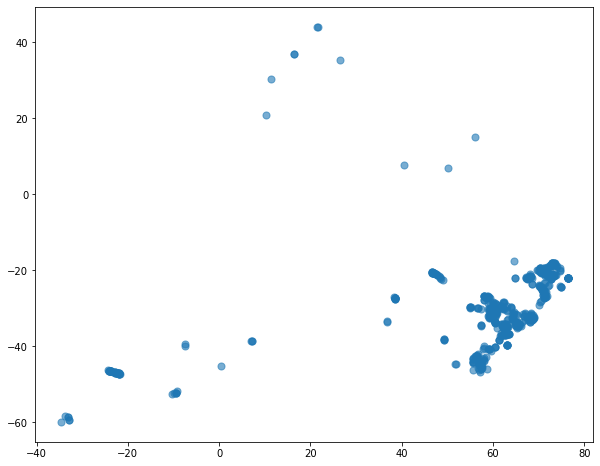

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Assume you have a list of class names and corresponding encoded labels
class_names = ['csv', 'doc', 'gif', 'gz', 'html', 'jpg', 'log', 'pdf', 'png',
               'ppt', 'ps', 'txt', 'xls', 'xml'] 
encoded_labels = list(range(14))

# Extract features (byte distributions) and class labels
features = files_df.iloc[:, :-1].values  # All columns except the last one
class_labels = files_df['Class'].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(class_labels)

# Create a mapping dictionary from encoded labels to class names
encoded_to_class = dict(zip(encoded_labels, class_names))
print(encoded_to_class)

# Step 2: Compute t-SNE embedding
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(features)

# Step 3: Create the scatter plot with different colors for each class and file names as the legend
unique_labels = np.unique(encoded_labels)
num_classes = len(unique_labels)
colors = plt.cm.tab10(np.linspace(0, 1, num_classes))  # Use a colormap for coloring the classes

plt.figure(figsize=(10, 8))
for i, label in enumerate(unique_labels):
    class_mask = (encoded_labels == label)
    plt.scatter(tsne_embeddings[class_mask, 0], tsne_embeddings[class_mask, 1], marker='o', s=50, alpha=0.6, color=colors[i], label=encoded_to_class[label])

plt.title('t-SNE Scatter Plot of Byte Distributions')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('tsne.png')
plt.show()


C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


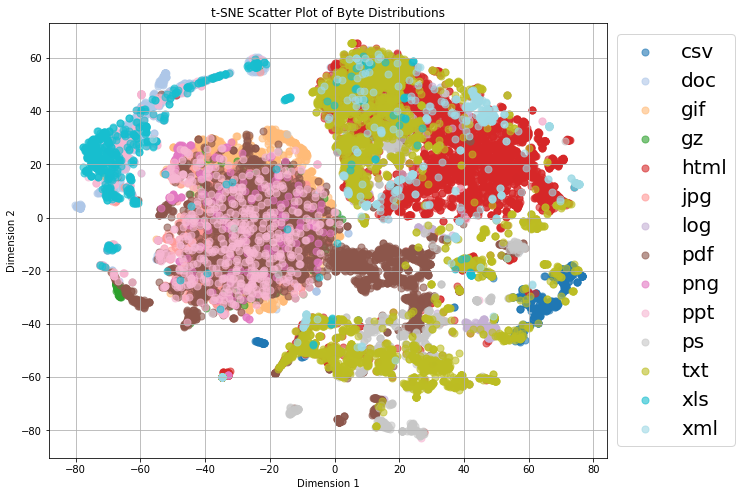

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Extract features (byte distributions) and class labels
features = files_df.iloc[:, :-1].values  # All columns except the last one
class_labels = files_df['Class'].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(class_labels)
#class_names = label_encoder.classes_
class_names = ['csv', 'doc', 'gif', 'gz', 'html', 'jpg', 'log', 'pdf', 'png',
               'ppt', 'ps', 'txt', 'xls', 'xml'] 

# Step 2: Compute t-SNE embedding
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(features)

# Step 3: Create the scatter plot with different colors for each class and file names as the legend
unique_labels = np.unique(encoded_labels)
num_classes = len(unique_labels)
colors = plt.cm.tab20(np.linspace(0, 1, num_classes))  # Use a colormap for coloring the classes

plt.figure(figsize=(10, 8))
for i, label in enumerate(unique_labels):
    class_mask = (encoded_labels == label)
    plt.scatter(tsne_embeddings[class_mask, 0], tsne_embeddings[class_mask, 1], marker='o', s=50, alpha=0.6, color=colors[i], label=class_names[label])

plt.title('t-SNE Scatter Plot of Byte Distributions')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.savefig('tsne.png')
plt.show()



In [27]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [28]:
files_df = normalize(files_df)
X = files_df.iloc[:, 0:255]
y = files_df.Class

In [29]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

print("Before oversampling",  X.shape, y.shape)
        
#oversample = RandomOverSampler(sampling_strategy="not majority")     
#X, y = oversample.fit_resample(X, y)


sm = SMOTE()
X, y = sm.fit_resample(X, y)
        
print("After oversampling",  X.shape, y.shape)

Before oversampling (18208, 255) (18208,)
After oversampling (53746, 255) (53746,)


In [30]:
class Model:
    def __init_subclass__(cls) -> None:
        pass

    def decisionTree(self, X_train, y_train, X_test, y_test):
        # training a DescisionTreeClassifier
        print('DescisionTreeClassifier')

        # dtree_model = DecisionTreeClassifier(criterion="entropy", max_depth=3).fit(X_train, y_train)
        dtree_model = DecisionTreeClassifier(criterion="gini", max_depth=3).fit(X_train, y_train)
        dtree_predictions = dtree_model.predict(X_test)

        # Metrics evaluation
        accuracy = metrics.accuracy_score(y_test, dtree_predictions)
        print("Accuracy:", accuracy)
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_test, dtree_predictions,
                                                                               average='weighted')
        cm = confusion_matrix(y_test, dtree_predictions)
        print(cm)
        
        print(sns.heatmap(cm,annot=True, cmap='Blues', fmt='g'))

        print("precision_recall_fscore_support:", precision)
        print("tpr = recall:", recall)
        print("fscore:", fscore)
        fpr = self.calculate_tpr_fpr(y_test, dtree_predictions)
        return accuracy, precision, recall, fscore, fpr

    # training a linear SVM classifier
    def SVClassifier(self, X_train, y_train, X_test, y_test):
        print('SVC Classifier')
        svm_model_linear = SVC(kernel='linear', C=1).fit(X_train, y_train)
        svm_predictions = svm_model_linear.predict(X_test)

        # creating a confusion matrix
        # cm = confusion_matrix(y_test, svm_predictions)

        # Metrics evaluation
        accuracy = metrics.accuracy_score(y_test, svm_predictions)
        print("Accuracy:", accuracy)
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_test, svm_predictions,
                                                                               average='weighted')
        
        cm = confusion_matrix(y_test, svm_predictions)
        print(cm)
        
        print("precision_recall_fscore_support:", precision)
        print("recall:", recall)
        print("fscore:", fscore)
        fpr = self.calculate_tpr_fpr(y_test, svm_predictions)
        return accuracy, precision, recall, fscore, fpr

    # training a KNN classifier
    def KNearestClassifier(self, X_train, y_train, X_test, y_test):
        print('KNearestClassifier')
        knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

        # prediction matrix
        knn_predictions = knn.predict(X_test)

        # Metrics evaluation
        accuracy = metrics.accuracy_score(y_test, knn_predictions)
        print("Accuracy:", accuracy)
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_test, knn_predictions,
                                                                               average='weighted')
        cm = confusion_matrix(y_test, knn_predictions)
        print(cm)
        
        print("precision_recall_fscore_support:", precision)
        print("recall:", recall)
        print("fscore:", fscore)
        fpr = self.calculate_tpr_fpr(y_test, knn_predictions)
        return accuracy, precision, recall, fscore, fpr

    # training a Naive Bayes classifier
    def NaiveBayes(self, X_train, y_train, X_test, y_test):
        print('NaiveBayes')
        gnb = GaussianNB().fit(X_train, y_train)
        gnb_predictions = gnb.predict(X_test)

        # accuracy on X_test
        accuracy = gnb.score(X_test, y_test)
        print(accuracy)

        # creating a confusion matrix
        cm = confusion_matrix(y_test, gnb_predictions)

        # Metrics evaluation
        accuracy = metrics.accuracy_score(y_test, gnb_predictions)
        print("Accuracy:", accuracy)
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_test, gnb_predictions,
                                                                               average='weighted')
        cm = confusion_matrix(y_test, gnb_predictions)
        print(cm)
        
        print("precision_recall_fscore_support:", precision)
        print("recall:", recall)
        print("fscore:", fscore)
        fpr = self.calculate_tpr_fpr(y_test, gnb_predictions)
        return accuracy, precision, recall, fscore, fpr

    def SGD(self, X_train, y_train, X_test, y_test):
        print('SGD')
        clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X_train, y_train)
        clf_predictions = clf.predict(X_test)

        # Model evaluation
        accuracy = metrics.accuracy_score(y_test, clf_predictions)
        print("Accuracy:", accuracy)
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_test, clf_predictions,
                                                                               average='weighted')
        cm = confusion_matrix(y_test, clf_predictions)
        print(cm)
        
        print("precision_recall_fscore_support:", precision)
        print("recall:", recall)
        print("fscore:", fscore)
        fpr = self.calculate_tpr_fpr(y_test, clf_predictions)
        return accuracy, precision, recall, fscore, fpr

    def LogisticReg(self, X_train, y_train, X_test, y_test):
        print('Logistic Regression')
        clf = LogisticRegression(random_state=0).fit(X_train, y_train)
        clf_predictions = clf.predict(X_test)

        # Model evaluation
        accuracy = metrics.accuracy_score(y_test, clf_predictions)
        print("Accuracy:", accuracy)
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_test, clf_predictions,
                                                                               average='weighted')
        cm = confusion_matrix(y_test, clf_predictions)
        print(cm)
        
        print("precision_recall_fscore_support:", precision)
        print("recall:", recall)
        print("fscore:", fscore)
        fpr = self.calculate_tpr_fpr(y_test, clf_predictions)
        return accuracy, precision, recall, fscore, fpr

    def RandomForest(self, X_train, y_train, X_test, y_test):
        print('RandomForest')
        clf = RandomForestClassifier(max_depth=2, random_state=0)
        clf.fit(X_train, y_train)
        clf_predictions = clf.predict(X_test)

        # Model evaluation
        accuracy = metrics.accuracy_score(y_test, clf_predictions)
        print("Accuracy:", accuracy)
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_test, clf_predictions,
                                                                               average='weighted')
        cm = confusion_matrix(y_test, clf_predictions)
        print(cm)
        
        print("precision_recall_fscore_support:", precision)
        print("recall:", recall)
        print("fscore:", fscore)
        fpr = self.calculate_tpr_fpr(y_test, clf_predictions)
        return accuracy, precision, recall, fscore, fpr

    def DnnPreprocessing(self, X, Y):
        X = np.array(X)

        # Transform name species into numerical values
        encoder = LabelEncoder()
        encoder.fit(Y)
        Y = encoder.transform(Y)
        Y = np_utils.to_categorical(Y)
        
        print("Before oversampling",  X.shape, Y.shape)
        
        oversample = RandomOverSampler(sampling_strategy="not majority")  #SMOTE()
        
        X, Y = oversample.fit_resample(X, Y)
        
        print("After oversampling",  X.shape, Y.shape)

        # split the data into train and test
        train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1, random_state=0)
        return train_x, test_x, train_y, test_y, encoder
    
    

    def DNN_Model(self, train_x, test_x, train_y, test_y, epoch, encoder):
        
        print("dim: ", train_x.shape[1], train_y.shape[1])
        
        model = Sequential()
        model.add(Dense(30, input_dim=train_x.shape[1], activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(15, activation = "relu"))
        model.add(Dropout(0.2))
        model.add(Dense(14, activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        history = model.fit(train_x, train_y, epochs=epoch, batch_size=100, validation_data=(test_x, test_y))

        scores = model.evaluate(test_x, test_y)
        print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

        predictions = model.predict(test_x)
        prediction_ = np.argmax(predictions, axis=1)
        prediction_ = encoder.inverse_transform(prediction_)

        test_y_ = np.argmax(test_y, axis=1)
        test_y_ = encoder.inverse_transform(test_y_)

        # Model evaluation
        accuracy = metrics.accuracy_score(test_y_, prediction_)
        print("Accuracy:", accuracy)
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(test_y_, prediction_, average='weighted')
        print("precision_recall_fscore_support:", precision)
        print("recall:", recall)
        print("fscore:", fscore)
        self.plot_Acc(history, epoch)
        fpr = self.calculate_tpr_fpr(test_y_, prediction_)
        return accuracy, precision, recall, fscore, fpr

    def plot_Acc(self, history, epoch):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs_range = range(epoch)

        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

    def calculate_tpr_fpr(self, true_y, pred_y):
        # creating a confusion matrix
        confusion_matrix = metrics.confusion_matrix(true_y, pred_y)

        FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
        FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
        TP = np.diag(confusion_matrix)
        TN = confusion_matrix.sum() - (FP + FN + TP)
        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)
        TN = TN.astype(float)
        # Sensitivity, hit rate, recall, or true positive rate
        # TPR = TP / (TP + FN)
        # Fall out or false positive rate
        FPR = FP / (FP + TN)
        print('FPR', np.average(FPR))
        return np.average(FPR)

DescisionTreeClassifier
Accuracy: 0.40730817890898263
[[919   0   0   0   0   0   8   0   0   0  31   0   0   0]
 [  1 566   0  86   0  93   0   0   0   0 175   0  30   2]
 [  0   5   0 539   0 384   0   0   0   0  23   0   0   0]
 [  0   2   0 799   0 151   0   0   0   0   5   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0 231   0   0 712]
 [  0  11   0 216   0 713   0   0   0   0   8   0   0   7]
 [ 19   0   0   0   0   0 399   0   0   0 366   0   0 175]
 [  0   2   0 614   0 155   0   0   0   0 143   0   0  67]
 [  0   2   0 505   0 451   0   0   0   0  12   0   0   1]
 [  0 375   0 288   0 298   0   0   0   0  23   0   3   2]
 [  0   0   0   1   0   3   1   0   0   0 857   0   0  55]
 [ 53   0   0   0   0   0   5   0   0   0 902   0   0   5]
 [  0 452   0  13   0 104   0   0   0   0   3   0 399   0]
 [  2   1   0   0   0   1   0   0   0   0 133   0   0 821]]


C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AxesSubplot(0.125,0.125;0.62x0.755)
precision_recall_fscore_support: 0.321270279330682
tpr = recall: 0.40730817890898263
fscore: 0.31457394761785523
FPR 0.04554159587897786
KNearestClassifier
Accuracy: 0.8817444370023071
[[950   0   0   0   7   0   0   0   0   0   0   1   0   0]
 [  1 836   2   2   2   3   0   0   4  10   0   1  92   0]
 [  0   3 902  19  10   7   0   0   5   1   2   0   2   0]
 [  0   1   2 953   0   0   0   0   0   0   0   0   1   0]
 [ 16  51   0   0 668   0  24   1   0   0   2 107   4  79]
 [  0   3   9   8   1 906   0   8   6  12   0   0   2   0]
 [  0   0   0   0   0   0 959   0   0   0   0   0   0   0]
 [  0  36 155 213   0 109   2 285  82  67  26   0   6   0]
 [  0   0   0   0   9   0   0   0 962   0   0   0   0   0]
 [  0  11   9   8   3  12   0   3   3 928   0   0  12   0]
 [  0   0   1   0   0   0   1   4   0   2 907   2   0   0]
 [ 25  60   0   0  85   0  33   1   0   0  14 700  15  32]
 [  1   2   1   0   0   0   0   0   0   2   0   0 965   0]
 [  0   1   

C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.71303118255563
[[907   0   0   0   0   0   5   0   0   0   0  38   0   8]
 [  0 661  18  42   3  60   0   4  29  39   1  44  45   7]
 [  0   5 629 100   0  76   0  36  73  22   0   0   0  10]
 [  0   2 153 601   0  83   0  42  61  15   0   0   0   0]
 [  4  13   0   0 675   0  12   0   0   0   7 115   0 126]
 [  0   8  84  78   0 688   0  23  28  36   0   0   0  10]
 [  0   0   0   0  22   0 851   0   0   0   3  81   0   2]
 [  0   3 125 174   0 149   5 366  84  26  28   8   2  11]
 [  0   0  99  83   0  34   0  18 716  12   0   0   0   9]
 [  0 132  95 121   5 140   0  33  76 343   1   0  23  20]
 [  0   0   0   1   2   0   6   1   1   0 853  41   0  12]
 [ 34  10   0   0  26   0  39   3   0   0  44 754   5  50]
 [  0 191   2   3   1   7   2   0   3  17   2  15 723   5]
 [  0  15   0   0  82   0   5   2   0   0   0  39   1 814]]
precision_recall_fscore_support: 0.7268771057024789
recall: 0.71303118255563
fscore: 0.7090761344024803
FPR 0.022073540468918167
RandomForest
Accu

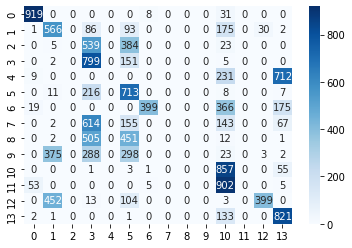

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True)

metrics_list_bytes = []
model_labels=[]

my_models = Model()
# accuracy, precision, recall, fscore, fpr = my_models.decisionTree(X_train, y_train, X_test, y_test)
model_labels.append('DT')
metrics_list_bytes.append(my_models.decisionTree(X_train, y_train, X_test, y_test))

model_labels.append('KNN')
metrics_list_bytes.append(my_models.KNearestClassifier(X_train, y_train, X_test, y_test))

model_labels.append('NB')
metrics_list_bytes.append(my_models.NaiveBayes(X_train, y_train, X_test, y_test))

model_labels.append('SGD')
metrics_list_bytes.append(my_models.SGD(X_train, y_train, X_test, y_test))

model_labels.append('LR')
metrics_list_bytes.append(my_models.LogisticReg(X_train, y_train, X_test, y_test))

model_labels.append('RF')
metrics_list_bytes.append(my_models.RandomForest(X_train, y_train, X_test, y_test))

model_labels.append('SVC')
metrics_list_bytes.append(my_models.SVClassifier(X_train, y_train, X_test, y_test))
